In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def read_data(file_path):
    data = pd.read_csv(file_path, header=None)
    data.columns = ["random_seed", "crossover", "number_of_parameters", "MRPS", "number_of_evaluations"]
    data = data[data["number_of_evaluations"] > 0]
    data.drop(columns=["random_seed"], inplace=True)
    grouped_data_mean = data.groupby(["crossover", "number_of_parameters"]).mean()
    grouped_data_std = data.groupby(["crossover", "number_of_parameters"]).std()
    summary_data = pd.merge(grouped_data_mean, grouped_data_std, on=["crossover", "number_of_parameters"], suffixes=('_mean', '_std'))
    return summary_data

def Mrps_comparison(line1x_mrps, lineUx_mrps, label):
    plt.figure(figsize=(8, 6))

    plt.errorbar([point[0] for point in line1x_mrps], [point[1] for point in line1x_mrps], yerr=[point[2] for point in line1x_mrps], fmt='o-', capsize=5, label='1X')
    plt.errorbar([point[0] for point in lineUx_mrps], [point[1] for point in lineUx_mrps], yerr=[point[2] for point in lineUx_mrps], fmt='o-', capsize=5, label='UX')
    
    plt.yscale('log')
    plt.xlabel('Number of Parameters')
    plt.ylabel('MRPS (log-scale)')
    plt.title(f'MRPS Comparison of {label}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Comparision_plot/Comparison of MRPS - {label}')
    # plt.show()
    return plt

def Evaluations_comparison(line1x_eval, lineUx_eval, label):
    plt.figure(figsize=(8, 6))

    plt.errorbar([point[0] for point in line1x_eval], [point[1] for point in line1x_eval], yerr=[point[2] for point in line1x_eval], fmt='o-', capsize=5, label='1X')
    plt.errorbar([point[0] for point in lineUx_eval], [point[1] for point in lineUx_eval], yerr=[point[2] for point in lineUx_eval], fmt='o-', capsize=5, label='UX')
    
    plt.yscale('log')
    plt.xlabel('Number of Parameters')
    plt.ylabel('Number of Evaluations (log-scale)')
    plt.title(f'Evaluations Comparison of {label}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Comparision_plot/Comparison of Evaluations - {label}')
    # plt.show()
    return plt

def t_statistic(line1x_mrps, line1x_eval, lineUx_mrps, lineUx_eval):
    t_statistic_mrps, p_value_mrps = stats.ttest_ind([row[1] for row in line1x_mrps], [row[1] for row in lineUx_mrps])
    t_statistic_eval, p_value_eval = stats.ttest_ind([row[1] for row in line1x_eval], [row[1] for row in lineUx_eval])
    if p_value_mrps < 0.05:
        print("Sự khác biệt giữa GA-1X và GA-UX về MRPS là ý nghĩa thống kê.")
    else:
        print("Không có sự khác biệt ý nghĩa thống kê giữa GA-1X và GA-UX về MRPS.")
        
    if p_value_eval < 0.05:
        print("Sự khác biệt giữa GA-1X và GA-UX về số lượng đánh giá là ý nghĩa thống kê.")
    else:
        print("Không có sự khác biệt ý nghĩa thống kê giữa GA-1X và GA-UX về số lượng đánh giá.")
    return t_statistic_mrps, t_statistic_eval

def PlotDrawing(data, label):
    line1x_mrps = []
    line1x_eval = []
    lineUx_mrps = []
    lineUx_eval = []
    for index, row in data.iterrows():
        crossover = index[0]
        number_of_parameters = index[1]
        MRPS = row['MRPS_mean']
        number_of_evaluations = row['number_of_evaluations_mean']
        std_MRPS = row['MRPS_std']
        std_number_of_evaluations = row['number_of_evaluations_std']
        if crossover == '1X':
            line1x_mrps.append([number_of_parameters, MRPS, std_MRPS])
            line1x_eval.append([number_of_parameters, number_of_evaluations, std_number_of_evaluations])
        elif crossover == 'UX':
            lineUx_mrps.append([number_of_parameters, MRPS, std_MRPS])
            lineUx_eval.append([number_of_parameters, number_of_evaluations, std_number_of_evaluations])
    
    plt1 = Mrps_comparison(line1x_mrps, lineUx_mrps, label)
    plt2 = Evaluations_comparison(line1x_eval, lineUx_eval, label)
    
    return plt1, plt2, None


In [10]:
onemax = read_data('results/onemax.txt')
leadingone = read_data('results/leadingone.txt')
cctrapk = read_data('results/concatenated_trap_k.txt')

In [11]:
onemax

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                         59.6                      273.20   
          20                        124.0                      819.76   
          40                        368.0                     3599.36   
          80                       1222.4                    17336.64   
          160                      5145.6                   104994.56   
UX        10                         39.2                      173.32   
          20                         53.2                      320.54   
          40                         89.6                      740.60   
          80                        158.4                     1789.52   
          160                       272.0                     4237.04   

                                   MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                          
1X        10                      14.292189                  68.545654  
          20                      29.028721                 173.497481  
          40                      52.797306                 434.742374  
          80                     226.676078                3026.412131  
          160                   1378.338065               25369.773687  
UX        10                       9.199034                  38.530242  
          20                       8.011103                  45.072095  
          40                       9.082339                  71.347475  
          80                      23.186203                 253.339074  
          160                     30.169889                 439.076534

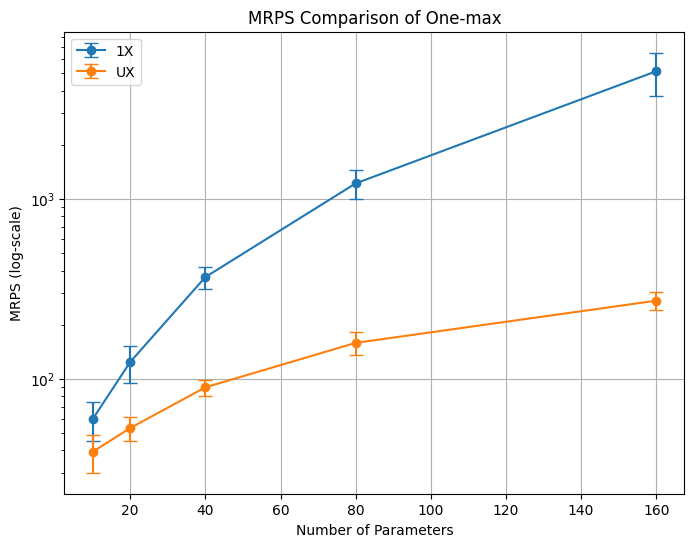

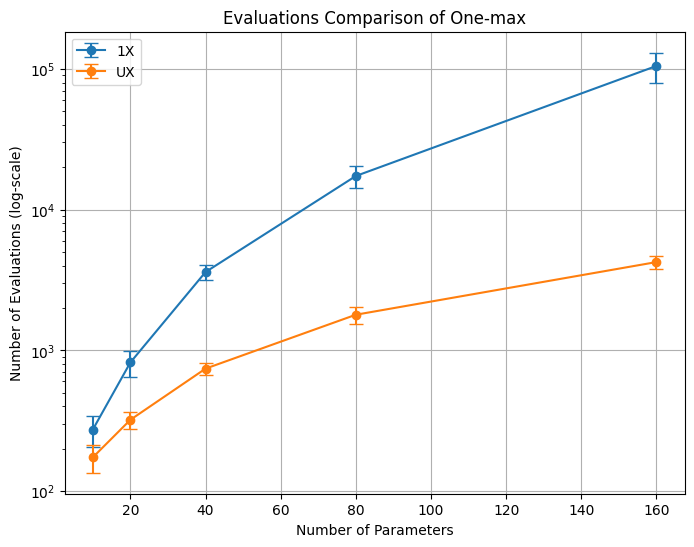

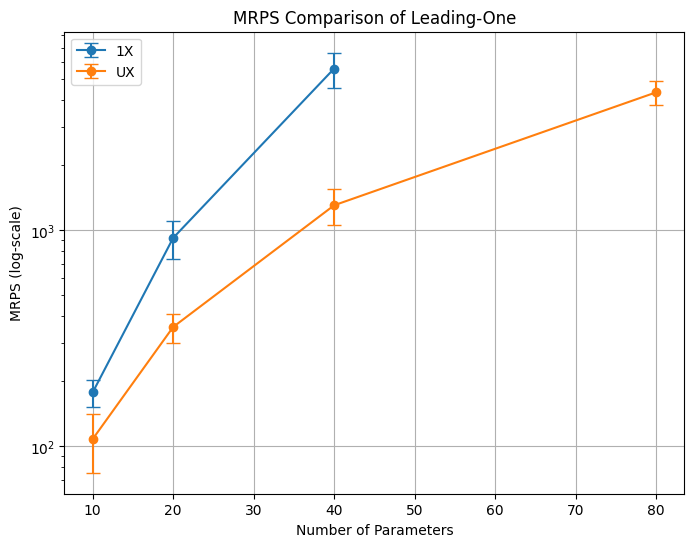

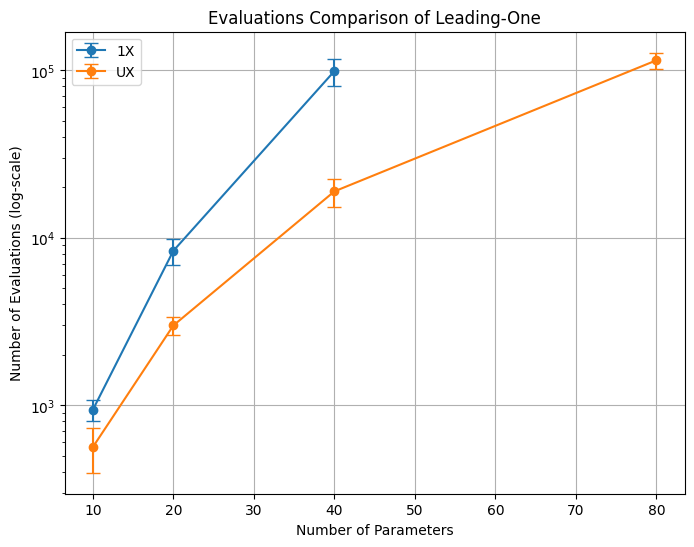

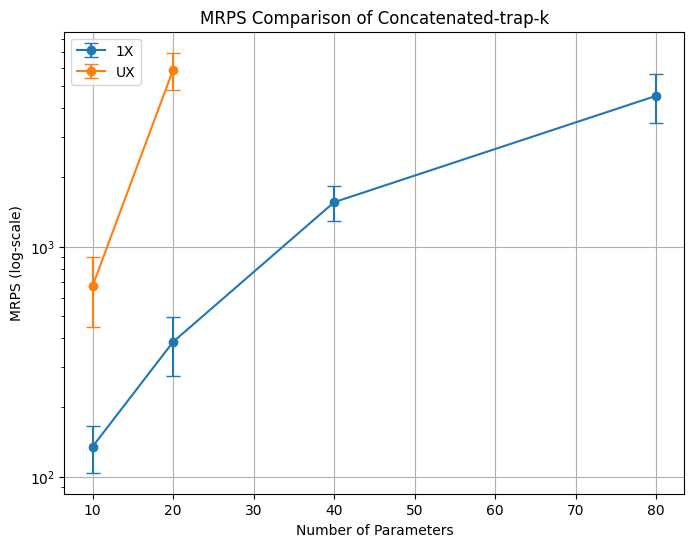

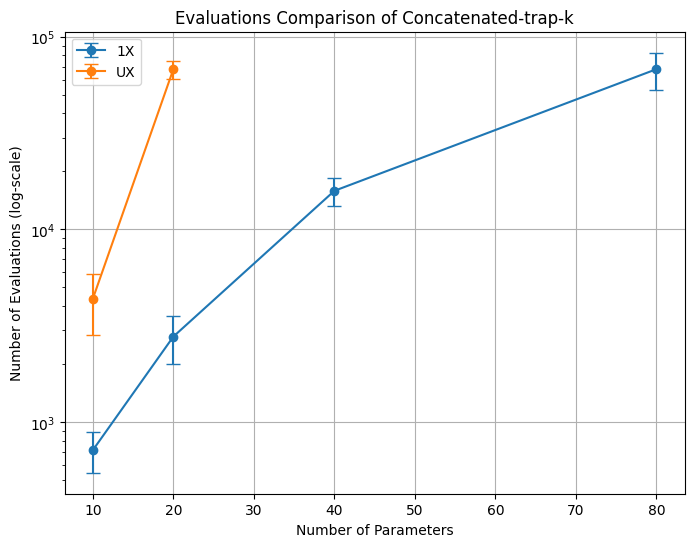

In [12]:
t1, onemax_1, onemax_2 = PlotDrawing(onemax, 'One-max')
t2, leadingone_1, leadingone_2 = PlotDrawing(leadingone, 'Leading-One')
t3, cctrapk_1, cctrapk_2 = PlotDrawing(cctrapk, 'Concatenated-trap-k')

In [13]:
onemax

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                         59.6                      273.20   
          20                        124.0                      819.76   
          40                        368.0                     3599.36   
          80                       1222.4                    17336.64   
          160                      5145.6                   104994.56   
UX        10                         39.2                      173.32   
          20                         53.2                      320.54   
          40                         89.6                      740.60   
          80                        158.4                     1789.52   
          160                       272.0                     4237.04   

                                   MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                          
1X        10                      14.292189                  68.545654  
          20                      29.028721                 173.497481  
          40                      52.797306                 434.742374  
          80                     226.676078                3026.412131  
          160                   1378.338065               25369.773687  
UX        10                       9.199034                  38.530242  
          20                       8.011103                  45.072095  
          40                       9.082339                  71.347475  
          80                      23.186203                 253.339074  
          160                     30.169889                 439.076534

In [14]:
leadingone

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                        177.6                      937.12   
          20                        921.6                     8343.68   
          40                       5606.4                    98726.40   
UX        10                        108.0                      561.12   
          20                        356.8                     2988.72   
          40                       1305.6                    18896.00   
          80                       4352.0                   114607.36   

                                   MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                          
1X        10                      25.522104                 137.637824  
          20                     184.011594                1489.073696  
          40                    1027.195016               17929.186217  
UX        10                      32.496154                 166.432454  
          20                      54.415684                 371.896368  
          40                     247.319496                3592.851609  
          80                     539.695387               12554.855058

In [15]:
cctrapk

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                        135.2                      716.04   
          20                        385.6                     2780.40   
          40                       1561.6                    15869.44   
          80                       4531.2                    67880.96   
UX        10                        675.2                     4366.56   
          20                       5888.0                    67801.60   

                                   MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                          
1X        10                      31.201140                 169.096995  
          20                     110.452805                 780.261130  
          40                     268.495065                2605.737554  
          80                    1093.132990               14741.555989  
UX        10                     229.989758                1516.088807  
          20                    1086.116016                7186.467639

In [16]:
onemax_2